# Дашборд для Яндекс.Дзен

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание" data-toc-modified-id="Описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Цель-и-задачи:" data-toc-modified-id="Цель-и-задачи:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Цель и задачи:</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Построение-дашборда-в-Tableau" data-toc-modified-id="Построение-дашборда-в-Tableau-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построение дашборда в Tableau</a></span></li><li><span><a href="#Ответы-на-запрос-бизнеса" data-toc-modified-id="Ответы-на-запрос-бизнеса-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ответы на запрос бизнеса</a></span><ul class="toc-item"><li><span><a href="#Cколько-взаимодействий-пользователей-с-карточками-происходит-в-системе-с-разбивкой-по-темам-карточек" data-toc-modified-id="Cколько-взаимодействий-пользователей-с-карточками-происходит-в-системе-с-разбивкой-по-темам-карточек-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек</a></span></li><li><span><a href="#Как-много-карточек-генерируют-источники-с-разными-темами?" data-toc-modified-id="Как-много-карточек-генерируют-источники-с-разными-темами?-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Как много карточек генерируют источники с разными темами?</a></span></li><li><span><a href="#Как-соотносятся-темы-карточек-и-темы-источников?" data-toc-modified-id="Как-соотносятся-темы-карточек-и-темы-источников?-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Как соотносятся темы карточек и темы источников?</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

   ## Описание

Будучи аналитиком в "Дзене" требуется анализировать пользовательское взаимодействия с карточками статей.\
Каждую карточку определяют её тема и источник (у него тоже есть тема). Примеры тем: «Красота и здоровье», «Россия», «Путешествия».
Пользователей системы характеризует возрастная категория. Например, «26-30» или «45+».\
Есть три способа взаимодействия пользователей с системой:\
Карточка отображена для пользователя (`show`);\
Пользователь кликнул на карточку (`click`);\
Пользователь просмотрел статью карточки (`view`).\
Для автоматизации еженедельного отчета с ответами на вопросы менеджмента нужно сделать дашборд: 

Пообщавшись с менеджерами и администраторами баз данных, было написано краткое ТЗ:\

Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;\
Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;\
Кто будет основным пользователем дашборда: менеджеры по анализу контента;\
Состав данных для дашборда:\
История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);\
Разбивка событий по темам источников;\
Таблица соответствия тем источников темам карточек;\
По каким параметрам данные должны группироваться:
- Дата и время;\
- Тема карточки;\
- Тема источника;\
- Возрастная группа;\

Характер данных:
История событий по темам карточек — абсолютные величины с разбивкой по минутам;
Разбивка событий по темам источников — относительные величины (% событий);
Соответствия тем источников темам карточек - абсолютные величины;
Важность: все графики имеют равную важность;\
Источники данных для дашборда: дата-инженеры обещали подготовить для вас агрегирующую таблицу dash_visits. Вот её структура:
`record_id` — первичный ключ,\
`item_topic` — тема карточки,\
`source_topic` — тема источника,\
`age_segment` — возрастной сегмент,\
`dt` — дата и время,\
`visits` — количество событий.\

Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):

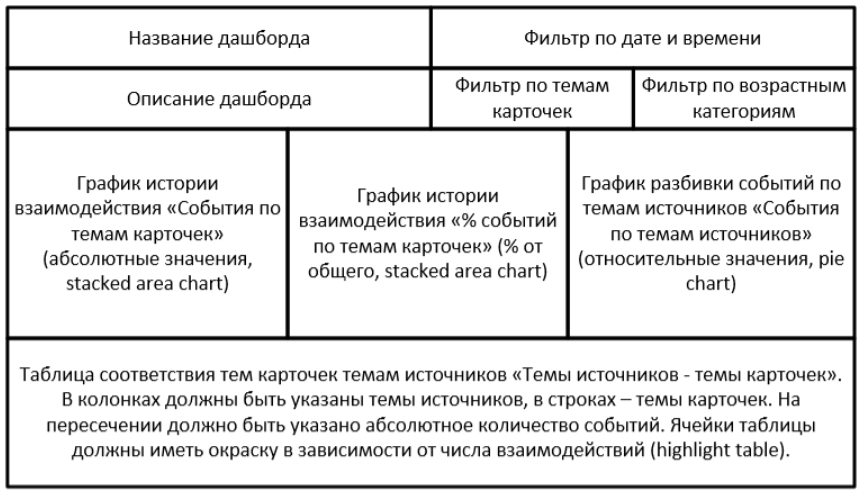

## Цель и задачи:

**Цель:** составить дашборд в соответствии ТЗ и ответить на вопросы менеджмента

**Задачи**
1. Создать подключение к базе данных и выгрузить необходимую информацию.
2. Провести обзор и предобработку данных, выгрузить данные в .csv-файл.
3. Загрузить .csv-файл в Tableau и подготовить дашборд в соответствии с ТЗ.
4. Ответить на вопросы бизнеса:
- Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
- Как много карточек генерируют источники с разными темами?
- Как соотносятся темы карточек и темы источников?
5. Подготовить презентацию с решением.

## Обзор данных

In [63]:
import pandas as pd
from sqlalchemy import create_engine
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 

In [65]:
query  = '''
SELECT * FROM dash_visits
'''

In [66]:
df = pd.io.sql.read_sql(query, con = engine) 

In [67]:
df.to_csv(r'D:\Jypiter\Portfolio\Course_Data_Analyst\10_Dashboard_for_Yandex_Dzen\dash_visits.csv', encoding = 'utf-8', index=False)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


In [69]:
df.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


## Предобработка данных

In [70]:
prof = ProfileReport(df)
prof.to_file(output_file = 'report.html')

Предобработка данных была проведена с помощью специальной функции ProfileReport библиотеки pandas_profiling.
В результате в датафрейме:
- дубликаты не обнаружены;
- пропуски не обнаржуены;
- типы данных соответствуют значениям.

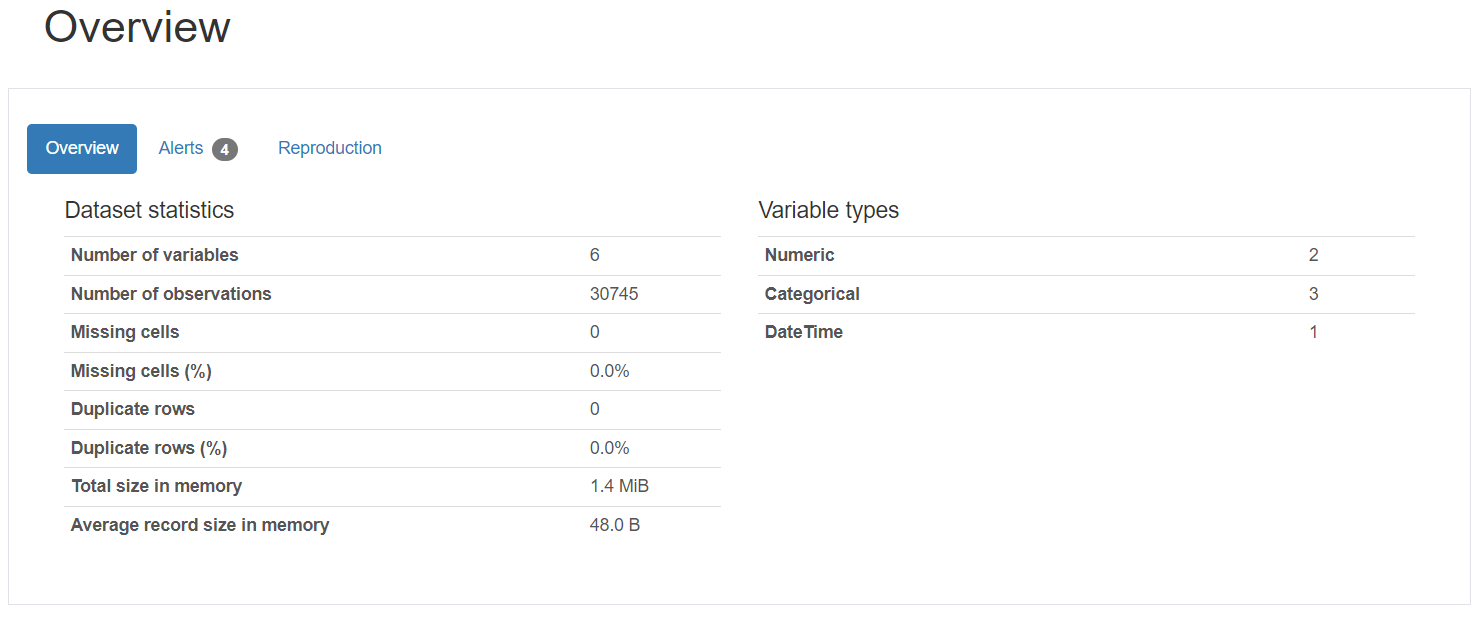

## Построение дашборда в Tableau

    Используя выгруженные данные был построен дашборд в соответствии с запросом заказчика:

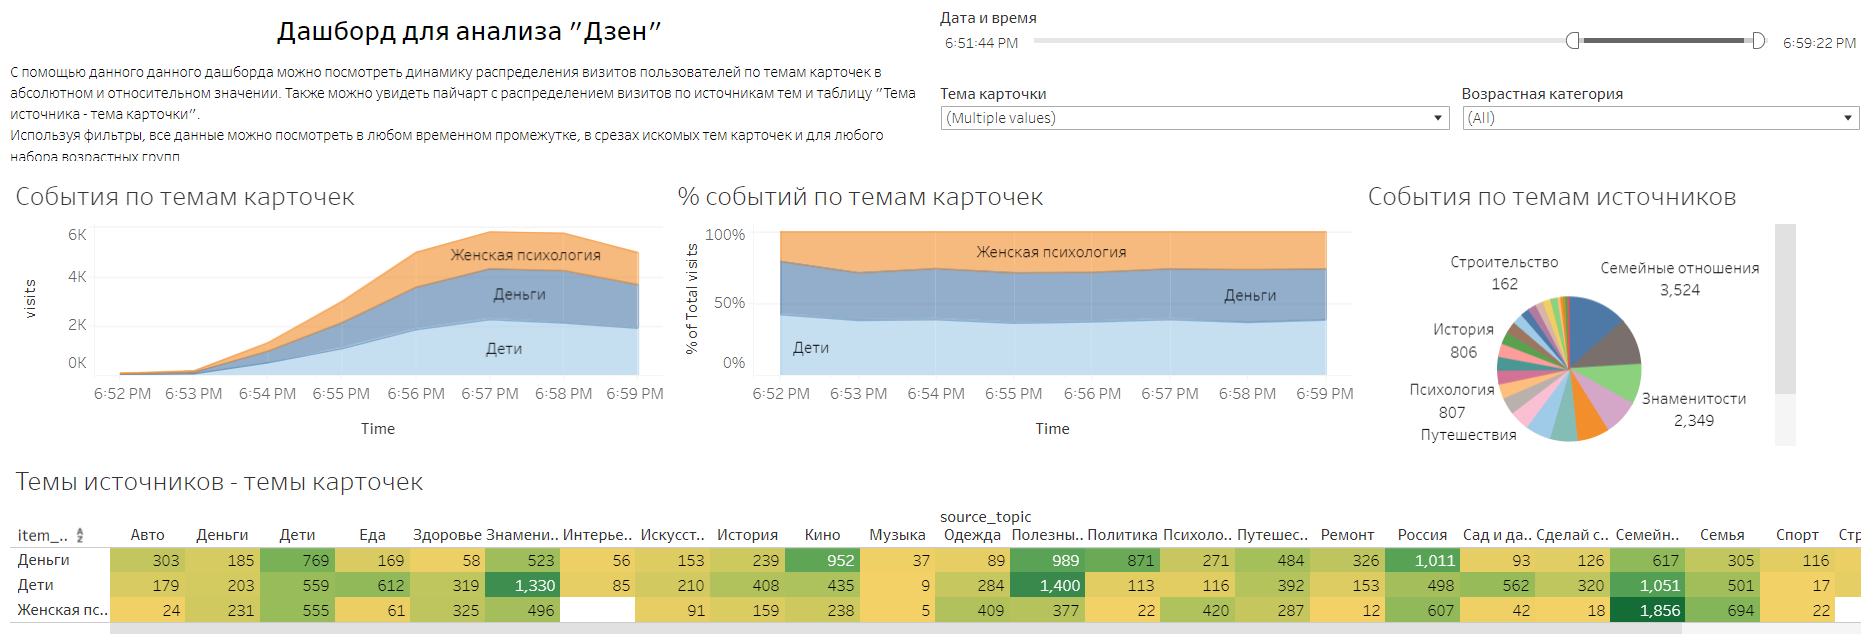

Ссылка на дашборд:
https://public.tableau.com/app/profile/andrei.anisimov/viz/Dzendashboard_16816420955850/Dashboard1?publish=yes

## Ответы на запрос бизнеса

Помимо составления дашборда заказчик задал нам следующие вопросы:<br>
- Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
- Как много карточек генерируют источники с разными темами?
- Как соотносятся темы карточек и темы источников?<br>

По порядку ответим на все вопросы, используя дашборд и дополнительные построения с помощью Python.

### Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек

In [78]:
df.groupby('item_topic', as_index=False)['visits'].sum().sort_values(by='visits', ascending=False)

,item_topic,visits
11,Наука,21736
13,Отношения,20666
6,Интересные факты,19942
12,Общество,19640
14,Подборки,17772
19,Россия,16966
15,Полезные советы,15435
8,История,15389
20,Семья,11897
3,Женщины,11499


<div style="border:solid Green 2px; padding: 20px"> 

Наибольшее количество событий происходит в темах:
- наука;
- отношения;
- интересные факты.

Наименьшее количество в темах:
- знаменитости;
- шоу;
- женская психология

### Как много карточек генерируют источники с разными темами?

In [80]:
df.groupby('source_topic', as_index=False)['record_id'].count().sort_values(by='record_id', ascending=False)

,source_topic,record_id
20,Семейные отношения,1822
17,Россия,1687
5,Знаменитости,1650
12,Полезные советы,1578
15,Путешествия,1563
9,Кино,1505
2,Дети,1459
8,История,1437
21,Семья,1405
11,Одежда,1379


<div style="border:solid Green 2px; padding: 20px"> 
    
Наибольшее количество карточек генерируют источники с темами:
- семейные отношения;
- Россия;
- знаменитости.

Наименьшее количество карточек:
- финансы;
- технологии;
- музыка.

### Как соотносятся темы карточек и темы источников?

In [77]:
pvt = df.pivot_table(index='item_topic', columns='source_topic', values='record_id', aggfunc='count')

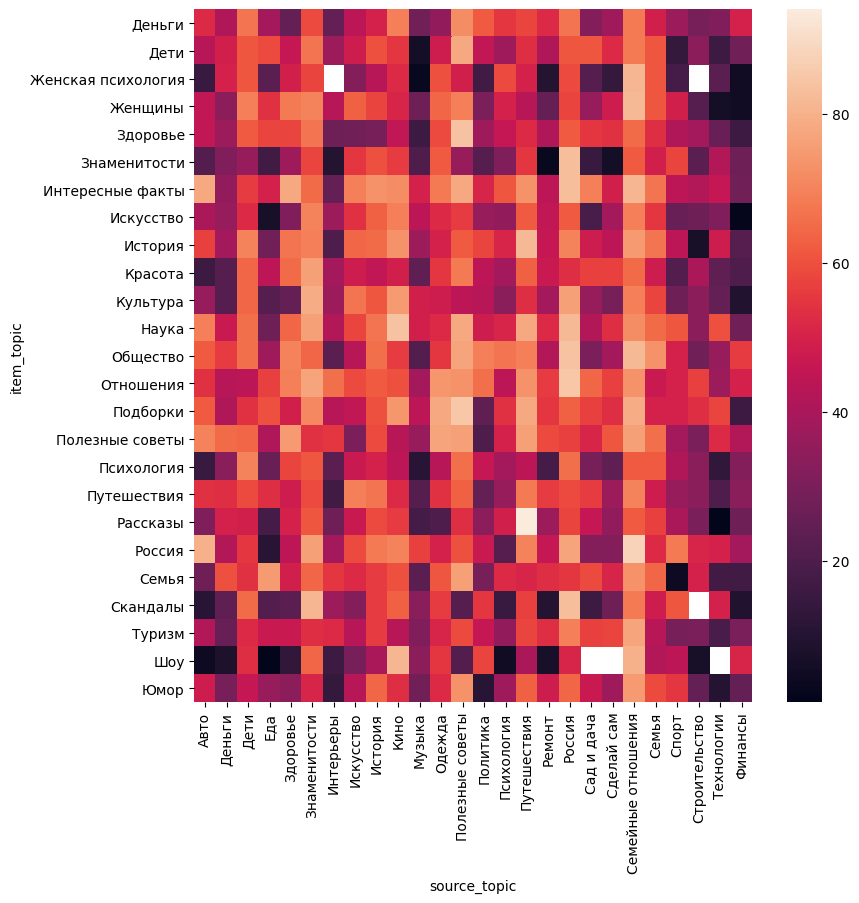

In [76]:
plt.figure(figsize=(9,9))
sns.heatmap(pvt)

plt.show()

<div style="border:solid Green 2px; padding: 20px"> 
Можем наблюдать следующие закономерности:<br>
- некоторые темы источники не генерируют карточки с определнными темами (белые клетки)<br>
- семейные отношения генерируют карточки почти с любыми темами<br>
- Финансы, музыка, технологии, строительство, интерьереы генерируют карточки с узкой направленностью (это может быть наоборот плюсом, когда пользователь будет оставаться в рамках темы, не перескакивая в совсем далекие истории)

## Выводы и рекомендации

<div style="border:solid Green 2px; padding: 20px"> 
<b>Выводы:</b><br>
1.  Было выполнено подключение к БД, с помощью SQL выгружены данные, сформирован csv-файл, которые далее был загружен и обработан в Tableau. На основе данных построен дашборд по техническому заданию заказчика. Даны ответы на поставленные вопросы. Подготовлена презентация.<br>
2. Найдены темы-лидеры и -аутсайдеры по количеству действий пользователей.<br>
3. Найдены источники с темами, которые генерируют наибольшее количество карточек.<br>
4. Найдены темы источников, генерирующими узко-направленные карточки.<br>

<b>Рекомендации:</b><br>
1. Использовать дашборд для отслеживания показателей и принятия бизнес-решений в разы быстрее, чем было ранее. При надобности его можно расширить, дополнить или сделать еще один для ответа на другие вопросы.<br>
2. На основании дашборда, определить места для возможного улучшения алгоритмов генерациии карточек в зависимости от источника.

<div style="border:solid Green 4px; padding: 20px"> 
Презентация для заказчика: https://disk.yandex.ru/i/tkjVZQo4TvAG1g
    
Также версия презентации находится в отправленном архиве.